# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split.

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

# DictVectorizer is expecting input in the form of a list of dictionaries, but it's receiving a list of strings instead.

The DictVectorizer is designed to handle dictionaries where keys represent feature names and values represent feature values

SklearnClassifier from the nltk library along with a scikit-learn pipeline for training a classifier. The SklearnClassifier is a wrapper that allows you to use scikit-learn classifiers within the NLTK framework.

In [124]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [125]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


lemmatizer = WordNetLemmatizer()
vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
stop_words = set(stopwords.words('english'))

In [126]:
glb_txt = []
glb_labels = []
def load_data(path):
  with open('sentiment-dataset.tsv') as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            glb_txt.append(text)
            glb_labels.append(label)
            raw_data.append((text, label))

In [127]:
def split_data(percentage):
  xtr, xte , ytr , yte = train_test_split(glb_txt, glb_labels, test_size=1-percentage, random_state=0)
  train_data = xtr
  test_data = xte
  return train_data , test_data , ytr , yte

In [128]:
def parse_data_line(data_line):
    text = data_line[2]
    label = data_line[1]
    return (label , text)

In [129]:
def process_feat(train_data):
 train_data = pre_process(train_data)
 train_feat, vectorizer = to_feature_vector(train_data)
 return train_feat, vectorizer


In [130]:
def pre_process(text):
    arr = []
    tokenizer = WordPunctTokenizer()
    token_word = [tokenizer.tokenize(txt) for txt in text]

    for tk in token_word:
      lemma_word = [lemmatizer.lemmatize(word) for word in tk]
      big = BigramCollocationFinder.from_words(lemma_word)
      bigrams = big.nbest(BigramAssocMeasures.chi_sq, 500)
      tmp = [w for w in lemma_word if not w.lower() in stop_words]
      arr.append(' '.join(tmp))

    return arr

In [131]:
global_feature_dict = {} # A global dictionary of features

def to_feature_vector(data):
   vectorizer = CountVectorizer()
   trans = vectorizer.fit_transform(data)
   return trans ,vectorizer


In [132]:
def train_classifier(feat, y):
    print("Training Classifier...")
    classifier = LinearSVC()
    return classifier.fit(feat, y)


In [133]:
def predict_labels(samples, classifier):
    return classifier.predict(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [134]:
def cross_validate(train_feat, test_feat, ytr, yte):
    cls = train_classifier(train_feat, ytr)
    y_pred = predict_labels(test_feat,cls)

    accuracy = accuracy_score(yte, y_pred)

    print('Accuracy: ',accuracy)
    return y_pred, yte


In [135]:
#MAIN
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset

train_feat = []
test_feat = []

data_file_path = 'sentiment-dataset.tsv'

print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path)

train_data , test_data , ytr , yte = split_data(0.8)

print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 26832 trainData, 6708 testData
Preparing training and test data...


In [136]:
train_feat, vectorizer = to_feature_vector(train_data)
test_feat = vectorizer.transform(test_data)
print(train_feat.shape)
print(test_feat.shape)

(26832, 48862)
(6708, 48862)


In [137]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds,labels =labels)
   # cm = cnf_mat
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')

    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

Training Classifier...
Accuracy:  0.8497316636851521


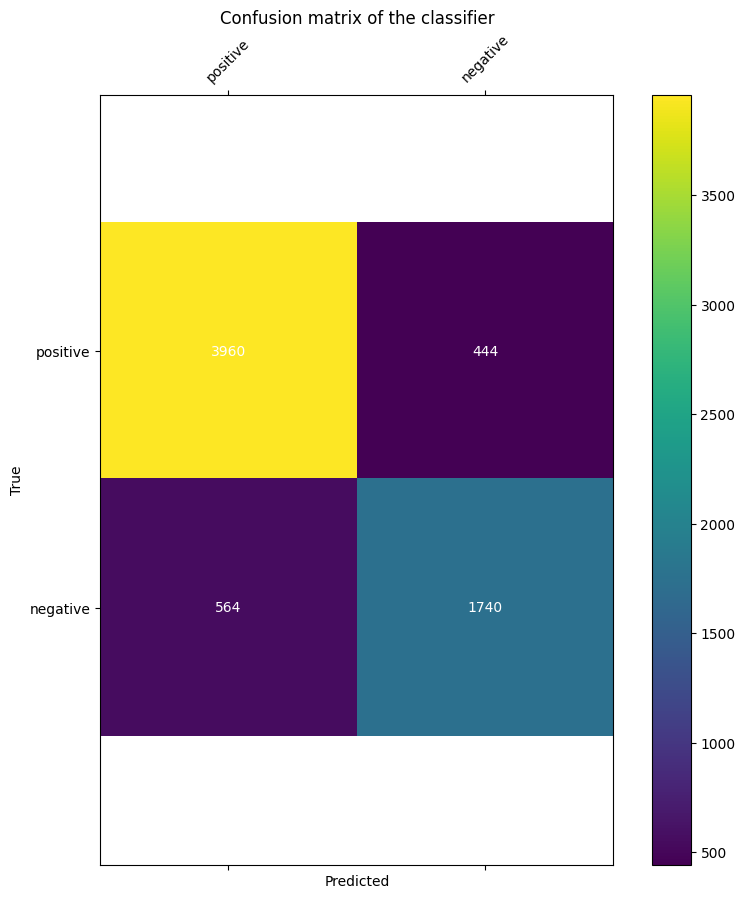

In [139]:
ypred,yte = cross_validate(train_feat,test_feat,ytr,yte)
confusion_matrix_heatmap(yte,ypred,['positive','negative'])

0.8437686344663089


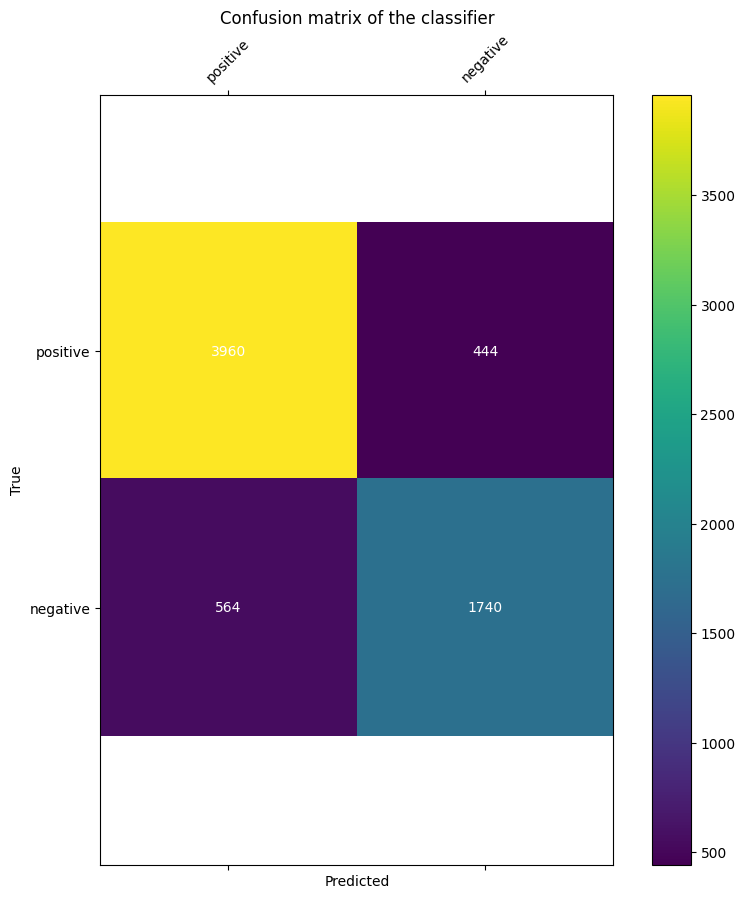

In [142]:
from sklearn.naive_bayes import MultinomialNB

nbcls = MultinomialNB()
nbcls.fit(train_feat, ytr)
y_pred = nbcls.predict(test_feat)
accuracy = accuracy_score(yte, y_pred)

print(accuracy)
confusion_matrix_heatmap(yte,ypred,['positive','negative'])